# Project 1: World Development Statistics

# Part 1: Introduction

## Problem Statement
Its hard to deny that our population is growing. Whether its a stroll down the park or the wait time for dinner. The amount of people we have to interact with in increasing. This study looks at the last hundred years (1924 - 2024) and aim to answer the following four questions

1. How has population changed?
2. How has life expectancy and population changed together
3. How has life expectancy, population, and Gross National Income (GNI) changed together
4. How well are countries doing in terms of GNI and life expectancy


### Contents:
- [Background](#Background)
- [Data Cleaning](#Data-Cleaning)
- [EDA & Visualization](#EDA-&-Visualization)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Background

Population size affects labor markets, consumer demand, and the overall economic growth of a region. A larger population can mean a larger workforce, potentially boosting economic production and innovation. However, if growth outpaces the available resources or job market capacity, it can lead to unemployment, underemployment, and economic strain.

### Choose your Data

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

The datasets from Gapminder, including `population.csv`, `life_expectancy.csv`, and `gni_per_cap_atlas_method_con2021.csv`, offer a wealth of information on key global indicators across various countries. The `population.csv` dataset provides detailed records of population sizes by country, allowing for analysis of demographic changes, growth patterns, and projections. `Life_expectancy.csv` tracks the life expectancy at birth by country, offering insights into the health and well-being of populations, as well as the effectiveness of healthcare systems and public health policies. The `gni_per_cap_atlas_method_con2021.csv` dataset measures the Gross National Income (GNI) per capita in current US dollars, reflecting the economic performance and living standards of nations. Together, these datasets form a comprehensive resource for researchers, policymakers, and educators to explore the interconnections between population dynamics, health outcomes, and economic development, providing a foundation for informed decision-making aimed at promoting sustainable and equitable progress worldwide.

### Outside Research
Over the last century, from 1924 to 2024, the global population has surged from approximately 2 billion to over 8 billion, driven by advancements in healthcare, agriculture, and living standards, highlighting a profound transformation in human society. This period has also witnessed a remarkable increase in life expectancy, from an average of 46 years to more than 72 years, reflecting the success of medical innovations and public health initiatives. Concurrently, Gross National Income (GNI) per capita has risen, indicative of global economic development. However, the relationship between GNI and life expectancy reveals disparities among countries, with high-income nations generally exhibiting higher life expectancies, whereas many low-income countries face challenges in health and economic performance. This study's exploration into the dynamics of population growth, life expectancy, and economic progress underscores the importance of sustainable development policies that are inclusive and equitable, ensuring that advancements in healthcare and economic growth translate into improved quality of life for all populations. Key sources supporting this research include data and reports from the United Nations Department of Economic and Social Affairs, the World Health Organization, and the World Bank, which collectively provide comprehensive insights into global demographic and economic trends over the past century.

### Coding Challenges

In [2]:
import numpy as np

1. Manually calculate mean:

In [3]:
def calc_mean(numbers: list):
    """
    This function calculates the mean of a list of numbers

    Args:
    numbers: list of numbers

    Return:
    float: mean of numbers in the list
    """
    return sum(numbers) / len(numbers)

# Sanity check
np.random.seed(31)
random_list = [np.random.randint(1, 101) for _ in range(10)]
assert calc_mean(random_list) == np.mean(random_list)

2. Manually calculate the standard deviation
   $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [4]:
def calc_std(numbers: list):
    """
    This function calculates the standard deviation of the numbers in the list

    Args:
    numbers: list of numbers
    
    Returns:
    float: standard deviation of the numbers in the list
    """
    mean = calc_mean(numbers)
    return (sum([(x - mean)**2 for x in numbers])/len(numbers))**0.5

# Sanity check

np.random.seed(31)
random_list = [np.random.randint(1, 101) for _ in range(10)]
assert calc_std(random_list) == np.std(random_list)

3. Data cleaning function
   Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K')

In [5]:
def string_to_float(string: str):
    """
    This fuction converts a string to an integer

    ex: 45M -> 45_000_000

    Args:
    string: string to be converted

    Returns:
    float: float values of the string
    """

    if isinstance(string, (int, float)):
        return float(string)

    multiplier = string[-1]

    if multiplier == "k":
        return float(string[:-1])*1_000
    elif multiplier == "M":
        return float(string[:-1])*1_000_000
    elif multiplier == "B":
        return float(string[:-1])*1_000_000_000
    
    return float(string)

# Sanity check
assert string_to_float("45M") == 45_000_000
assert string_to_float("1k") == 1_000
assert string_to_float("2.5B") == 2_500_000_000 

# Part 2: Data Cleaning

## Data Dictionary

### Population by Country (`population.csv`)
| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| country | String | The name of the country. |
| 1800 - 2100 | String | Population estimates from the year 1800 to 2100. Values are in a compact format with 'k' representing thousands (e.g., '10k' for 10,000) and 'M' for millions (e.g., '1M' for 1,000,000). |

### Life Expectancy by Country (`life_expectancy.csv`)
| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| country | String | The name of the country. |
| 1800 - 2100 | Float | Life expectancy at birth from the year 1800 to 2100, measured in years. |

### Gross National Income (GNI) per Capita in Current US Dollars (`gni_per_cap_atlas_method_con2021.csv`)
| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| country | String | The name of the country. |
| 1800 - 2050 | String | GNI per capita from the year 1800 to 2050, expressed in current US dollars. Values are in a compact format with 'k' representing thousands (e.g., '10k' for 10,000) and simple numerical values for amounts below $1,000. |

### Merged Data (`merged_data.csv`)
| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| country | String | The name of the country. |
| continent | String | The continent on which the country is located. |
| 1924_gni - 2024_gni | Float | Gross National Income (GNI) per capita from 1924 to 2024 in current US dollars. |
| 1924_life_expectancy - 2024_life_expectancy | Float | Life expectancy at birth from 1924 to 2024, measured in years. (Assuming its presence based on initial request) |
| 1924_population - 2024_population | Float | Population numbers from 1924 to 2024. Values are absolute and represent the total population. |


## Imports

In [6]:
import pandas as pd

## Reading Data

In [7]:
gni_pth = "~/Documents/generalassembly/projects/project_1/data/gni_per_cap_atlas_method_con2021.csv"
life_expectancy_pth = "~/Documents/generalassembly/projects/project_1/data/life_expectancy.csv"
population_pth = "~/Documents/generalassembly/projects/project_1/data/population.csv"

In [8]:
gni = pd.read_csv(gni_pth)
life_expectancy = pd.read_csv(life_expectancy_pth)
population = pd.read_csv(population_pth)

## Data Cleaning

I am going to follow similar steps for all three datasets.

1. Ensure the dataframe is being read correctly with `.head()`
2. Remove the unnecessary columns (Keep 1924 - 2024)
3. Check dataframe `dtypes` and convert them to `float` if needed
4. View missing values by row (country)
5. Fill or drop rows (country) with missing values
6. Ensure missing values have been addressed
7. Rename columns to `xxx_dataset` where `xxx` = year and `dataset` = `_gni` or  `_life_expectancy` or `population`

### GNI Dataset

Lets display for first few rows of the `gni_expectancy` data

In [9]:
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


Filter the `gni` dataset to keep years 1924 - 2024

In [10]:
cols = [gni.columns[0]] + [col for col in gni.columns[1:] if int(col) >= 1924 and int(col) <= 2024]
gni = gni[cols]

gni.head()

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,376,378,380,382,384,387,388,390,392,...,655,611,578,531,530,500,508,519,531,539
1,Angola,749,769,789,809,830,852,874,897,919,...,5020,4190,3760,3340,3030,2140,2090,2070,2080,2100
2,Albania,451,455,458,462,466,470,472,473,475,...,4880,4800,4680,5060,5330,5210,5480,5710,5950,6160
3,United Arab Emirates,10k,10.5k,10.9k,11.3k,11.7k,11.4k,11.1k,10.9k,10.6k,...,47.6k,45.1k,42.8k,43.2k,44.7k,39.4k,39.4k,39.2k,39.1k,38.9k
4,Argentina,3460,3340,3410,3540,3660,3720,3480,3160,3000,...,14k,13.6k,14.3k,12.9k,11.5k,9070,9500,9640,9750,9810


Check`gni` `dtypes`

In [11]:
gni.dtypes.value_counts()

object    102
Name: count, dtype: int64

The datatypes are `objects`. This will be changed to `float` in order to work with it in the EDA section. 

I will use the predefined `string_to_float` function that maps the new values to my `gni` dataframe.

In [12]:
for col in gni.columns[1:]:
    gni[col] = gni[col].apply(string_to_float)

gni.dtypes.value_counts()

float64    101
object       1
Name: count, dtype: int64

Ensure that `dtypes` changed to float

Check the `shape` and the amount of `NaN` values.

In [13]:
print(f"gni shape: {gni.shape}")
print(f"gni missing values: {gni.isnull().sum().sum()}")

gni shape: (191, 102)
gni missing values: 79


Look at missing values per country

In [14]:
gni.loc[gni.isnull().any(axis=1)]

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
100,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Liechtenstein has `NaN` for all the years between 1924 and 2024, So this row can be dropped 

Let's also ensure that the there are no more missing values after the row was dropped

In [15]:
gni.dropna(inplace=True)

print(f"Total NaN: {gni.isna().sum().sum()}")

Total NaN: 0


Rename the columns `year_gni` to make it easier to merge.

In [16]:
rename_dict = {col: f"{col}_gni" for col in gni.columns[1:]}

gni.rename(columns=rename_dict, inplace=True)
print(f"Shape: {gni.shape}")
gni.columns

Shape: (190, 102)


Index(['country', '1924_gni', '1925_gni', '1926_gni', '1927_gni', '1928_gni',
       '1929_gni', '1930_gni', '1931_gni', '1932_gni',
       ...
       '2015_gni', '2016_gni', '2017_gni', '2018_gni', '2019_gni', '2020_gni',
       '2021_gni', '2022_gni', '2023_gni', '2024_gni'],
      dtype='object', length=102)

### Life Expectancy Dataset

Lets display for first few rows of the `life_expectancy` data

In [17]:
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


Filter the `life_expectancy` dataset to keep years 1924 - 2024

In [18]:
cols = [gni.columns[0]] + [col for col in life_expectancy.columns[1:] if int(col) >= 1924 and int(col) <= 2024]

life_expectancy = life_expectancy[cols]

life_expectancy.head()

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,37.9,38.1,38.3,38.4,38.6,38.8,39.0,39.2,39.4,...,61.9,62.0,62.9,62.7,63.3,63.4,64.0,64.3,64.6,64.9
1,Angola,37.2,37.4,37.6,37.8,37.9,38.1,38.3,38.5,38.7,...,63.5,63.9,64.2,64.6,65.1,65.2,65.8,66.1,66.4,66.8
2,Albania,34.5,34.5,34.5,34.5,34.5,34.5,35.3,36.1,37.0,...,78.1,78.2,78.3,78.4,78.5,77.9,78.7,78.8,79.0,79.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,82.1,82.1,82.1,82.2,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,39.2,39.4,39.5,39.7,39.8,40.0,40.1,40.3,40.5,...,73.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3,74.4,74.6


Check`life_expectancy` `dtypes`

In [19]:
life_expectancy.dtypes.value_counts()

float64    101
object       1
Name: count, dtype: int64

All `dtypes` are `float` so no further conversion is needed

Lets now check the shape and how many `NaN` values there are.

In [20]:
print(f"life expectancy shape: {life_expectancy.shape}")
print(f"life expectancy missing values: {life_expectancy.isnull().sum().sum()}")

life expectancy shape: (195, 102)
life expectancy missing values: 279


Lets check which countries have `NaN` values

In [21]:
life_expectancy.loc[life_expectancy.isna().any(axis=1)]

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,82.1,82.1,82.1,82.2,NaN,NaN,NaN,NaN,NaN
46,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,72.3,71.2,72.3,72.3,NaN,NaN,NaN,NaN,NaN
93,St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.0,72.1,72.1,72.1,72.1,NaN,NaN,NaN,NaN,NaN
107,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.5,79.7,79.8,79.9,80.1,NaN,NaN,NaN,NaN,NaN
112,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.9,65.1,65.2,65.3,65.5,NaN,NaN,NaN,NaN,NaN
131,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.3,62.6,63.0,63.2,63.4,NaN,NaN,NaN,NaN,NaN
138,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.2,67.3,67.4,67.4,67.5,NaN,NaN,NaN,NaN,NaN
156,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,82.0,82.0,82.1,82.2,NaN,NaN,NaN,NaN,NaN
178,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.4,67.5,67.7,67.8,67.9,NaN,NaN,NaN,NaN,NaN


Drop rows (countries) with missing values

Ensure there are no more missing values

In [22]:
life_expectancy.dropna(inplace=True)

print(f"Total NaN: {life_expectancy.isna().sum().sum()}")

Total NaN: 0


Rename column to `year_life_expectancy` to make merging easier

In [23]:
rename_dict = {col: f"{col}_life_expectancy" for col in life_expectancy.columns[1:]}

life_expectancy.rename(columns=rename_dict, inplace=True)
print(f"Shape: {life_expectancy.shape}")
life_expectancy.columns

Shape: (186, 102)


Index(['country', '1924_life_expectancy', '1925_life_expectancy',
       '1926_life_expectancy', '1927_life_expectancy', '1928_life_expectancy',
       '1929_life_expectancy', '1930_life_expectancy', '1931_life_expectancy',
       '1932_life_expectancy',
       ...
       '2015_life_expectancy', '2016_life_expectancy', '2017_life_expectancy',
       '2018_life_expectancy', '2019_life_expectancy', '2020_life_expectancy',
       '2021_life_expectancy', '2022_life_expectancy', '2023_life_expectancy',
       '2024_life_expectancy'],
      dtype='object', length=102)

### Population Dataset

Lets display for first few rows of the `population_expectancy` data

In [24]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


Filter the `population` dataset to keep years 1924 - 2024

In [25]:
cols = [population.columns[0]] + [col for col in population.columns[1:] if int(col) >= 1924 and int(col) <= 2024]
population = population[cols]

population.head()

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,8.88M,8.42M,7.97M,7.56M,7.16M,6.85M,6.63M,6.48M,6.41M,...,33.8M,34.6M,35.6M,36.7M,37.8M,39M,40.1M,41.1M,42.2M,43.4M
1,Angola,2.98M,3.02M,3.07M,3.12M,3.16M,3.21M,3.26M,3.3M,3.35M,...,28.1M,29.2M,30.2M,31.3M,32.4M,33.4M,34.5M,35.6M,36.7M,37.8M
2,Albania,962k,967k,972k,977k,982k,988k,995k,1M,1.01M,...,2.88M,2.88M,2.88M,2.88M,2.87M,2.87M,2.85M,2.84M,2.83M,2.83M
3,Andorra,5360,5260,5170,5070,4980,4920,4890,4880,4900,...,71.7k,72.5k,73.8k,75k,76.3k,77.7k,79k,79.8k,80.1k,80.3k
4,United Arab Emirates,58.8k,59.3k,59.8k,60.4k,60.9k,61.4k,61.9k,62.4k,63k,...,8.92M,8.99M,9.07M,9.14M,9.21M,9.29M,9.37M,9.44M,9.52M,9.59M


Check`population` `dtypes`

In [26]:
population.dtypes.value_counts()

object    102
Name: count, dtype: int64

Use the predefined `string_to_float` function to map the new values to my `population` dataframe.

In [27]:
for col in population.columns[1:]:
    population[col] = population[col].apply(string_to_float)

population.dtypes.value_counts()

float64    101
object       1
Name: count, dtype: int64

Check for missing values

In [28]:
print(f"population shape: {population.shape}")
print(f"population missing values: {population.isnull().sum().sum()}")

population shape: (197, 102)
population missing values: 24


Look at missing values per country

In [29]:
population.loc[population.isna().any(axis=1)]

,country,1924,1925,1926,1927,1928,1929,1930,1931,1932,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
74,Holy See,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the rows (country) with missing values

Ensure values have been dropped

In [30]:
population.dropna(inplace=True)

population.isna().sum().sum()

0

Lets rename the columns to make it easier to merge later

In [31]:
rename_dict = {col: f"{col}_population" for col in population.columns[1:]}

population.rename(columns=rename_dict, inplace=True)
print(f"Shape: {population.shape}")
population.columns

Shape: (196, 102)


Index(['country', '1924_population', '1925_population', '1926_population',
       '1927_population', '1928_population', '1929_population',
       '1930_population', '1931_population', '1932_population',
       ...
       '2015_population', '2016_population', '2017_population',
       '2018_population', '2019_population', '2020_population',
       '2021_population', '2022_population', '2023_population',
       '2024_population'],
      dtype='object', length=102)

## Merging Data

Start off with checking the shapes of our three datasets

In [32]:
print(f"gni.shape: {gni.shape}")
print(f"life_expectancy.shape: {life_expectancy.shape}")
print(f"population.shape: {population.shape}")

gni.shape: (190, 102)
life_expectancy.shape: (186, 102)
population.shape: (196, 102)


The number rows (countries) do not match on each of the Datasets.

To complete the merger I will find the countries that are on 3 datasets by doing the following

1. Create a set of countries in in each dataset
2. Filter are original 3 datasets to keep only the countries shared by the 3 datasets
3. Print out the shapes of the filtered datasets to ensure they have the same shape.

In [33]:
countries = set(gni["country"]) & set(life_expectancy["country"]) & set(population["country"])
print(f"number of countries in all datasets: {len(countries)}")

gni = gni.loc[gni["country"].isin(countries)]
life_expectancy = life_expectancy.loc[life_expectancy["country"].isin(countries)]
population = population.loc[population["country"].isin(countries)]

# Print the shape of the filtered dataframes as a sanity check
print(f"Filtered GNI dataframe shape: {gni.shape}")
print(f"Filtered Life Expectancy dataframe shape: {life_expectancy.shape}")
print(f"Filtered Population dataframe shape: {population.shape}")

number of countries in all datasets: 184
Filtered GNI dataframe shape: (184, 102)
Filtered Life Expectancy dataframe shape: (184, 102)
Filtered Population dataframe shape: (184, 102)


Now that all the datasets are the same shape. Merge them together

* `first_merge` = `gni` + `life_expectancy`
* `data` = `first_merge` + `population`

In [34]:
first_merge = pd.merge(gni, life_expectancy, on="country", how="outer")
data = pd.merge(first_merge, population, on="country", how="outer")

data.head()

,country,1924_gni,1925_gni,1926_gni,1927_gni,1928_gni,1929_gni,1930_gni,1931_gni,1932_gni,...,2015_population,2016_population,2017_population,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population
0,Afghanistan,376.0,378.0,380.0,382.0,384.0,387.0,388.0,390.0,392.0,...,33800000.0,34600000.0,35600000.0,36700000.0,37800000.0,39000000.0,40100000.0,41100000.0,42200000.0,43400000.0
1,Angola,749.0,769.0,789.0,809.0,830.0,852.0,874.0,897.0,919.0,...,28100000.0,29200000.0,30200000.0,31300000.0,32400000.0,33400000.0,34500000.0,35600000.0,36700000.0,37800000.0
2,Albania,451.0,455.0,458.0,462.0,466.0,470.0,472.0,473.0,475.0,...,2880000.0,2880000.0,2880000.0,2880000.0,2870000.0,2870000.0,2850000.0,2840000.0,2830000.0,2830000.0
3,United Arab Emirates,10000.0,10500.0,10900.0,11300.0,11700.0,11400.0,11100.0,10900.0,10600.0,...,8920000.0,8990000.0,9070000.0,9140000.0,9210000.0,9290000.0,9370000.0,9440000.0,9520000.0,9590000.0
4,Argentina,3460.0,3340.0,3410.0,3540.0,3660.0,3720.0,3480.0,3160.0,3000.0,...,43300000.0,43700000.0,44100000.0,44400000.0,44700000.0,45000000.0,45300000.0,45500000.0,45800000.0,46100000.0


Once the data is merged lets make sure it merged correctly and we are not missing any values

In [35]:
print(f"data missing values: {data.isna().sum().sum()}")

data missing values: 0


Now I want to create a new column called continent. This will help out later in the EDA portion of the notebook when I want to do analysis by continent. for this we are going to use a python library called <a href="https://pypi.org/project/pycountry-convert/">pycountry_converter</a> you will need to run the command `pip install pycountry-convert`


In [36]:
# pip install pycountry-convert

import the library

In [37]:
import pycountry_convert as pc

Make a function that will get the country name and assign it to a continent

In [38]:
def country_to_continent(country_name):
    try:
        # Get country alpha-2 code
        country_code = pc.country_name_to_country_alpha2(country_name)
        # Get continent code from country alpha-2 code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Convert continent code to continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None  # Return None or a default value if country is not found

# Sanity Check
assert country_to_continent("Spain") == "Europe"
assert country_to_continent("USA") == "North America"
assert country_to_continent("Egypt") == "Africa"

/opt/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


Now apply this function to the country column of the merged dataset

In [39]:
data["continent"] = data["country"].apply(country_to_continent)

# Move the continent column next to the country column
data = data[['country', 'continent'] + [col for col in data.columns if col not in ['country', 'continent']]]

Check if there are any missing values. Due to the function not being able to find the continent.

In [40]:
data["continent"].isna().sum().sum()

8

From the output above we can see that we introduced 8 missing values in the continent column. 

To address check which countries are missing a continent value

In [41]:
data.loc[data["continent"].isna()]["country"]

32                      Cote d'Ivoire
34                   Congo, Dem. Rep.
35                        Congo, Rep.
57              Micronesia, Fed. Sts.
70                   Hong Kong, China
93                                Lao
164                       Timor-Leste
175    St. Vincent and the Grenadines
Name: country, dtype: object

Because there are only a few missing continents missing, manually add them in

In [42]:
data.loc[data["country"] == "Cote d'Ivoire", "continent"] = "Africa"
data.loc[data["country"] == "Congo, Dem. Rep.", "continent"] = "Africa"
data.loc[data["country"] == "Congo, Rep.", "continent"] = "Africa"
data.loc[data["country"] == "Micronesia, Fed. Sts.", "continent"] = "Oceania"
data.loc[data["country"] == "Hong Kong, China", "continent"] = "Asia"
data.loc[data["country"] == "Lao", "continent"] = "Asia"
data.loc[data["country"] == "Timor-Leste", "continent"] = "Asia"
data.loc[data["country"] == "St. Vincent and the Grenadines", "continent"] = "North America"

Now lets double check there are no missing values

In [43]:
print(f"data.shape: {data.shape}")
print(f"data missing values: {data.isna().sum().sum()}")

data.shape: (184, 305)
data missing values: 0


## Saving CSV

Save clean data as csv

In [44]:
data.to_csv("/Users/erikmercado/Documents/generalassembly/projects/project_1/data/merged_data.csv", index=False)

# Part 3 EDA & Visualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

## Read Merged Data

In [46]:
merged_data_pth = "/Users/erikmercado/Documents/generalassembly/projects/project_1/data/merged_data.csv"
merged_data = pd.read_csv(merged_data_pth)
merged_data.head()

,country,continent,1924_gni,1925_gni,1926_gni,1927_gni,1928_gni,1929_gni,1930_gni,1931_gni,...,2015_population,2016_population,2017_population,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population
0,Afghanistan,Asia,376.0,378.0,380.0,382.0,384.0,387.0,388.0,390.0,...,33800000.0,34600000.0,35600000.0,36700000.0,37800000.0,39000000.0,40100000.0,41100000.0,42200000.0,43400000.0
1,Angola,Africa,749.0,769.0,789.0,809.0,830.0,852.0,874.0,897.0,...,28100000.0,29200000.0,30200000.0,31300000.0,32400000.0,33400000.0,34500000.0,35600000.0,36700000.0,37800000.0
2,Albania,Europe,451.0,455.0,458.0,462.0,466.0,470.0,472.0,473.0,...,2880000.0,2880000.0,2880000.0,2880000.0,2870000.0,2870000.0,2850000.0,2840000.0,2830000.0,2830000.0
3,United Arab Emirates,Asia,10000.0,10500.0,10900.0,11300.0,11700.0,11400.0,11100.0,10900.0,...,8920000.0,8990000.0,9070000.0,9140000.0,9210000.0,9290000.0,9370000.0,9440000.0,9520000.0,9590000.0
4,Argentina,South America,3460.0,3340.0,3410.0,3540.0,3660.0,3720.0,3480.0,3160.0,...,43300000.0,43700000.0,44100000.0,44400000.0,44700000.0,45000000.0,45300000.0,45500000.0,45800000.0,46100000.0


1. Summary Statistics

In [47]:
merged_data.describe()

,1924_gni,1925_gni,1926_gni,1927_gni,1928_gni,1929_gni,1930_gni,1931_gni,1932_gni,1933_gni,...,2015_population,2016_population,2017_population,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,2024_population
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02
mean,1617.293478,1663.309783,1696.211957,1736.728261,1796.989130,1837.983696,1815.728261,1759.934783,1716.201087,1750.652174,...,3.999835e+07,4.051176e+07,4.095169e+07,4.145524e+07,4.184714e+07,4.226659e+07,4.268595e+07,4.305664e+07,4.341459e+07,4.381259e+07
std,2521.604733,2586.446588,2662.053654,2771.429763,2878.965143,2954.011311,2907.700842,2831.601408,2736.629427,2796.288350,...,1.456931e+08,1.472934e+08,1.484015e+08,1.500031e+08,1.506177e+08,1.517092e+08,1.528086e+08,1.534264e+08,1.540395e+08,1.546785e+08
min,48.000000,60.000000,67.000000,70.000000,73.000000,74.000000,78.000000,79.000000,77.000000,80.000000,...,8.990000e+04,9.060000e+04,9.110000e+04,9.160000e+04,9.210000e+04,9.270000e+04,9.320000e+04,9.380000e+04,9.430000e+04,9.480000e+04
25%,395.000000,397.750000,404.000000,407.500000,410.500000,410.250000,409.500000,411.500000,414.250000,418.000000,...,2.695000e+06,2.750000e+06,2.785000e+06,2.800000e+06,2.810000e+06,2.797500e+06,2.765000e+06,2.740000e+06,2.757500e+06,2.770000e+06
50%,779.500000,807.500000,807.000000,809.000000,817.500000,830.000000,847.500000,824.000000,816.000000,836.000000,...,9.105000e+06,9.225000e+06,9.370000e+06,9.515000e+06,9.605000e+06,9.690000e+06,9.730000e+06,9.960000e+06,1.015000e+07,1.009500e+07
75%,1490.000000,1582.500000,1552.500000,1575.000000,1715.000000,1715.000000,1720.000000,1572.500000,1537.500000,1600.000000,...,2.860000e+07,2.937500e+07,3.020000e+07,3.082500e+07,3.150000e+07,3.222500e+07,3.285000e+07,3.355000e+07,3.415000e+07,3.472500e+07
max,18800.000000,19400.000000,20300.000000,22000.000000,23200.000000,24100.000000,24500.000000,25000.000000,24500.000000,25400.000000,...,1.390000e+09,1.400000e+09,1.410000e+09,1.420000e+09,1.420000e+09,1.420000e+09,1.430000e+09,1.430000e+09,1.430000e+09,1.440000e+09


2. dictionary comprehension to apply `calc_std` defined above to each numeric column the dataframe

In [48]:
sd = {year: calc_std(merged_data[year]) for year in data.columns[2:]}

# sanity check: Ensure the dict has the same shape
assert len(sd) == data.shape[1] - 2 # subtract 2 to account for the "country" and "continent" columns

3. Investigate trends in data

## EDA & Visualization

### Correlation

As part of my problem statement I want to look at trends over time. So I am going to highlight the year 1961, 1991, 2021.

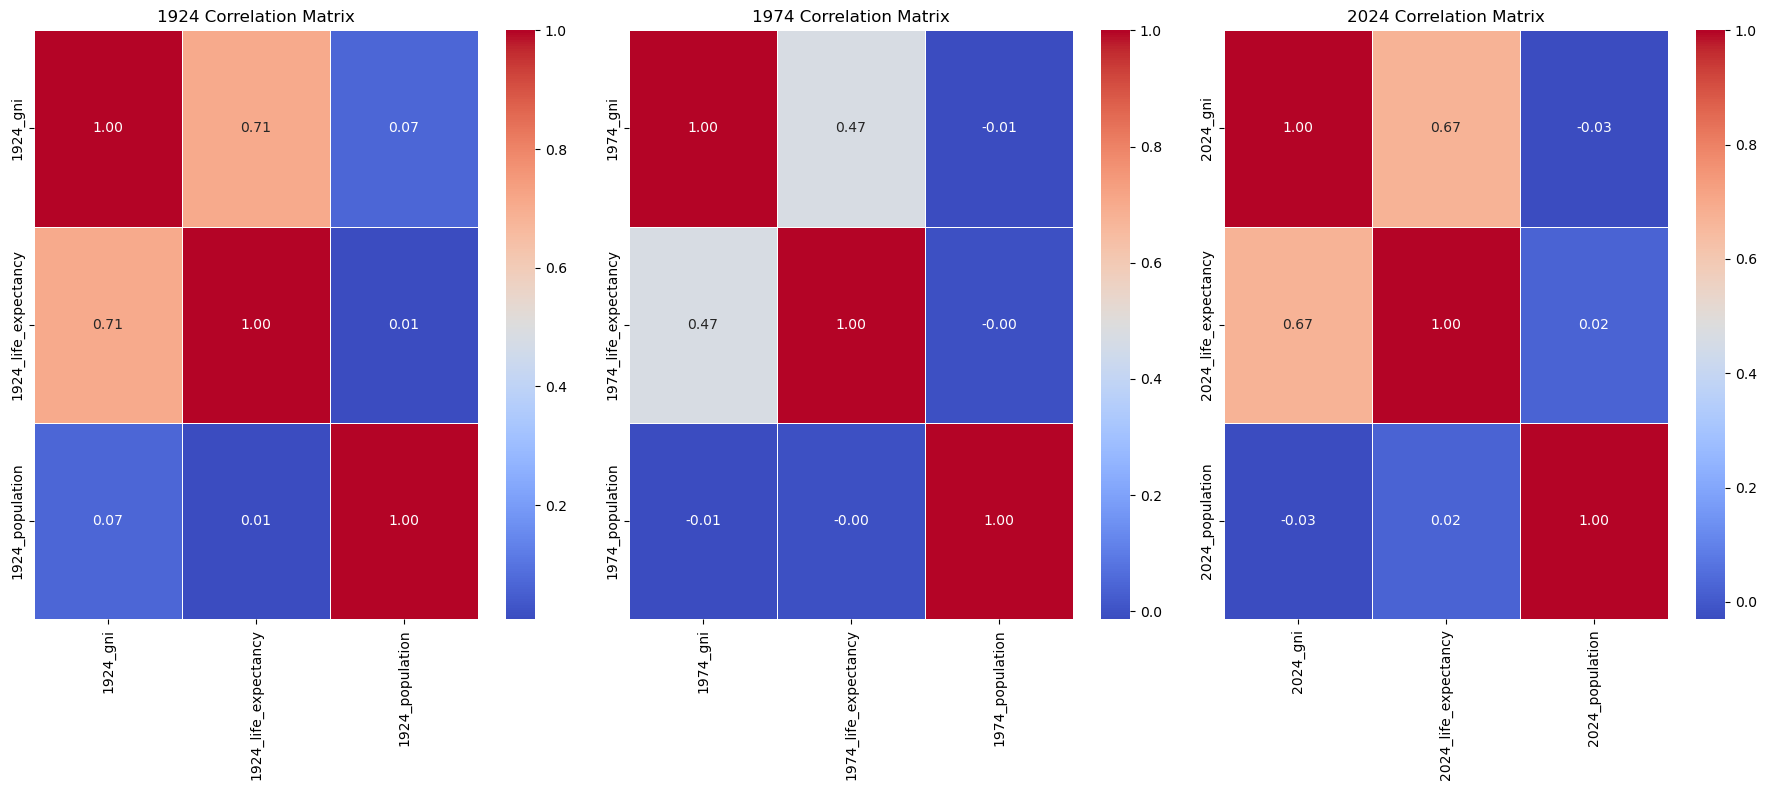

In [49]:
cols_1924 = [col for col in data.columns if col.startswith("1924")]
cols_1974 = [col for col in data.columns if col.startswith("1974")]
cols_2024 = [col for col in data.columns if col.startswith("2024")]


# Calculating the correlation matrices for 2021 and 1965 data
merged_corr_1924 = data[cols_1924].corr()
merged_corr_1974 = data[cols_1974].corr()
merged_corr_2024 = data[cols_2024].corr()

# Plotting the correlation matrices side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

# Plot for 1965
sns.heatmap(merged_corr_1924, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax[0])
ax[0].set_title("1924 Correlation Matrix")

# Plot for 1991
sns.heatmap(merged_corr_1974, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax[1])
ax[1].set_title("1974 Correlation Matrix")

# Plot for 2021
sns.heatmap(merged_corr_2024, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax[2])
ax[2].set_title("2024 Correlation Matrix")

plt.tight_layout()
plt.show()

From the following heatmaps we can see that over time correlation between these metrics have not changed much. But we can still get some take ways from these. In all three heatmaps `gni` and `life_expectancy` are heavily correlated. I can use this connection to calculate a human development index.

### Bar Graph Population Growth Rate vs Population Growth

In [50]:
selected_years = [1924, 1974, 2024]

population_sums = {}

for year in selected_years:
    population_sums[f'{year}_total_population'] = merged_data.groupby('continent')[f'{year}_population'].sum()

# Convert the dictionary to a DataFrame and reset index
population_sums_df = pd.DataFrame(population_sums).reset_index()

# Melt the DataFrame plotting
population_sums_melted = population_sums_df.melt(id_vars='continent', var_name='Year', value_name='Total Population')

In [51]:
population_growth_rates = {}

for i in range(len(selected_years) - 1):
    start_year, end_year = selected_years[i], selected_years[i + 1]
    
    start_population = population_sums[f'{start_year}_total_population']
    end_population = population_sums[f'{end_year}_total_population']
    
    growth_rate = ((end_population - start_population) / start_population) * 100
    growth_rate_column = f'{start_year}_to_{end_year}_growth_rate'
    
    # For each continent, calculate the growth rate and add it to the population_growth_rates dictionary
    for continent in population_sums_df['continent']:
        population_growth_rates.setdefault(growth_rate_column, []).append(growth_rate[continent])

# Vonvert the growth rates to a DataFrame
population_growth_df = pd.DataFrame(population_growth_rates)
population_growth_df['continent'] = population_sums_df['continent']

# Melt the population_growth_df for plotting
population_growth_melted = population_growth_df.melt(id_vars='continent', var_name='Years', value_name='Population Growth Rate')

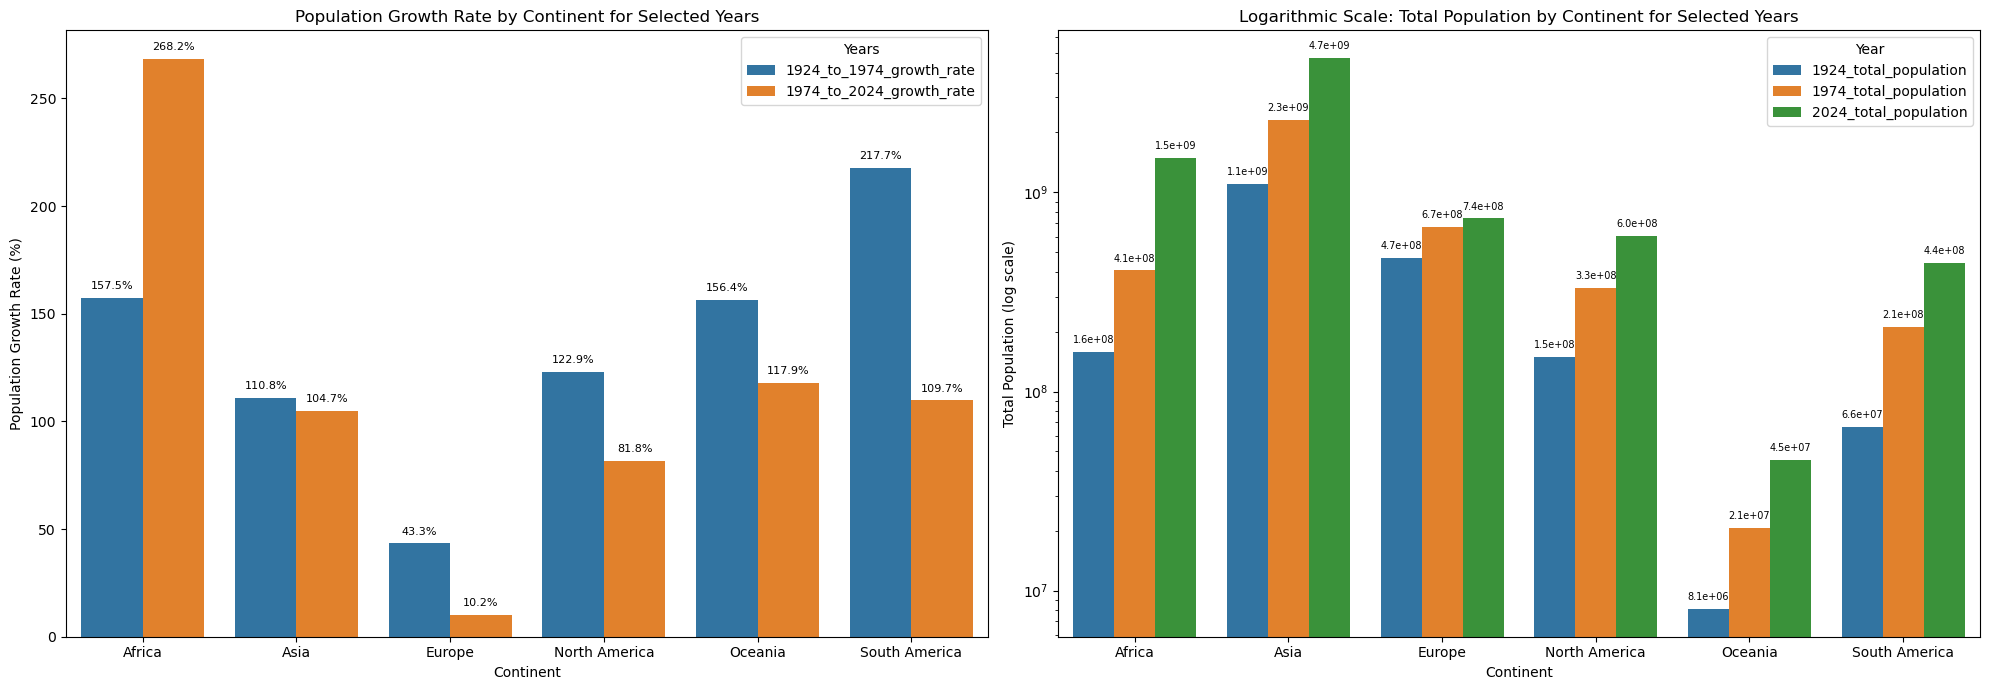

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Population Growth Rate plot
barplot1 = sns.barplot(ax=ax1, x='continent', y='Population Growth Rate', hue='Years', data=population_growth_melted)
ax1.set_title('Population Growth Rate by Continent for Selected Years')
ax1.set_xlabel('Continent')
ax1.set_ylabel('Population Growth Rate (%)')

# Total Population plot
barplot2 = sns.barplot(ax=ax2, x='continent', y='Total Population', hue='Year', data=population_sums_melted)
ax2.set_yscale('log')
ax2.set_title('Logarithmic Scale: Total Population by Continent for Selected Years')
ax2.set_xlabel('Continent')
ax2.set_ylabel('Total Population (log scale)')

# Annotate bars in the first subplot (ax1)
for p in barplot1.patches:
    height = p.get_height()  # Get the height of the bar
    if height > 0:  # Check if the height is greater than 0
        ax1.annotate(f'{height:.1f}%',  # Change to percentage format without scientific notation
                     (p.get_x() + p.get_width() / 2, height), 
                     ha='center', va='bottom',
                     fontsize=8, xytext=(0, 5), 
                     textcoords='offset points')

# Annotate bars in the second subplot (ax2)
for p in barplot2.patches:
    height = p.get_height()  # Get the height of the bar
    ax2.annotate(f'{height:.1e}', 
                 (p.get_x() + p.get_width() / 2, height), 
                 ha='center', va='bottom',
                 fontsize=7, xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


The purpose of plotting the growth rate with the total population in our analysis is to provide a clearer, more intuitive understanding of population dynamics. When observing that a specific continent's population has grown by a certain percentage, it's essential to contextualize what this percentage signifies in terms of absolute numbers. By presenting the growth rate alongside the total population figures, we facilitate a more comprehensive interpretation of demographic changes. This approach allows stakeholders to visually discern the magnitude of population shifts within a given time frame. For instance, by examining the accompanying graphs, one can easily observe the population of a specified continent at two different points in time, thereby appreciating the quantitative impact of the reported growth rate.

A key takeaway is the significant variation in growth rates across continents within these periods. Africa, for instance, shows a remarkably high growth rate, especially in the latter half of the century. This indicates rapid population increases which could have wide-ranging implications for resource allocation, development planning, and economic strategies.

In contrast, Europe's growth rate is relatively modest in both periods, suggesting a more stable population size which may reflect factors such as lower birth rates and higher levels of development. The stark difference between the growth rates of Africa and Europe could imply a shifting demographic landscape, with implications for global dynamics in terms of economic markets, geopolitical influence, and environmental impacts.

The use of a logarithmic scale for the total population graph on the right is important because it allows for easier comparison of populations across continents that vary widely in size. A logarithmic scale is particularly useful when data spans several orders of magnitude, as it is the case with population figures. It helps to represent large and small numbers on the same graph without small values being compressed down into an indistinguishable sliver at the bottom of the chart.

### Scatter Plot Life Expectancy vs Population

In [53]:
years = [1924, 1974, 2024]

# For life expectancy
life_expectancy_sums = {}
for year in years:
    life_expectancy_sums[f'{year}_life_expectancy'] = merged_data.groupby('continent')[f'{year}_life_expectancy'].mean()

life_expectancy_df = pd.DataFrame(life_expectancy_sums).reset_index()
life_expectancy_melted = life_expectancy_df.melt(id_vars='continent', var_name='Year', value_name='Average Life Expectancy')

In [54]:
life_expectancy_melted['Year'] = life_expectancy_melted['Year'].str.extract('(\d+)').astype(int)
population_sums_melted['Year'] = population_sums_melted['Year'].str.extract('(\d+)').astype(int)

# Merge the DataFrames
le_pop_data = pd.merge(life_expectancy_melted, population_sums_melted, on=['continent', 'Year'])

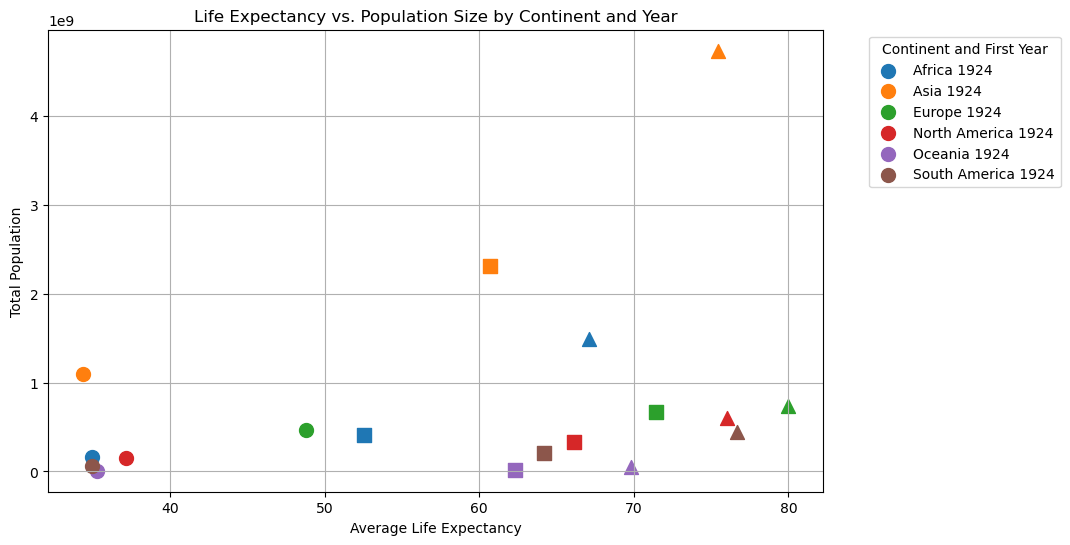

In [55]:
# Plotting
plt.figure(figsize=(10, 6))

# Use a different color for each continent
continents = le_pop_data['continent'].unique()
colors = plt.cm.tab10(range(len(continents)))
continent_colors = {continent: color for continent, color in zip(continents, colors)}

# Define a mapping for years to marker shapes
marker_shapes = ['o', 's', '^']  # Circle, Square, Triangle
years = le_pop_data['Year'].unique()
year_marker = {year: marker_shapes[i % len(marker_shapes)] for i, year in enumerate(sorted(years))}

for continent in continents:
    subset = le_pop_data[le_pop_data['continent'] == continent]
    for year in years:
        year_subset = subset[subset['Year'] == year]
        if not year_subset.empty:
            plt.scatter(year_subset['Average Life Expectancy'], year_subset['Total Population'], 
                        s=100, color=continent_colors[continent], marker=year_marker[year], 
                        label=f"{continent} {year}" if year == years[0] else "")

plt.title('Life Expectancy vs. Population Size by Continent and Year')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Total Population')
plt.legend(title="Continent and First Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The scatter plot displays a positive trend across all continents, where increases in both population size and life expectancy are observed from 1924 to 2024. This suggests that larger population sizes do not necessarily inhibit improvements in life expectancy. Taking Asia and North America as examples, despite Asia's much larger population, both continents see substantial gains in life expectancy, highlighting the global improvements in health and longevity over the past century.

### Line Plot - Simplified HDI Score

The Simplified Human Development Index (HDI) measure used to rank countries based on their level of human development. While the traditional HDI includes three dimensions: life expectancy, education level, and per capita income indicators, the simplified version focuses on just two of these dimensions: life expectancy and Gross National Income (GNI) per capita. This simplification makes the index more accessible while still providing valuable insights into the wellbeing and economic status of populations.

The Simplified HDI is important because it offers a broader perspective on development than economic performance alone. By including life expectancy, it incorporates a measure of health and longevity, allowing for a more comprehensive understanding of a country's or region's development.

We calculate the Simplified HDI using the following steps:

1. Normalize the GNI per capita and life expectancy data to a scale from 0 to 1, where 1 represents the best observed value and 0 represents the worst. This is done using the formula:

   $$\text{Normalized Value} = \frac{\text{Value} - \text{Minimum Value}}{\text{Maximum Value} - \text{Minimum Value}}$$

2. Calculate the Simplified HDI as the average of these normalized values:

   $$\text{Simplified HDI} = \frac{\text{Normalized GNI per Capita} + \text{Normalized Life Expectancy}}{2}$$

This approach allows us to plot the Simplified HDI over time for different continents, revealing trends and differences in development that can inform policy and aid decisions.

In [56]:
def normalize_column(column):
    """
    Normalize a pandas Series by scaling the values to a range of 0 to 1.

    Parameters:
    column (pandas.Series): A pandas Series object containing numerical values.

    Returns:
    pandas.Series: A pandas Series with the normalized values.
    """
    return (column - column.min()) / (column.max() - column.min())

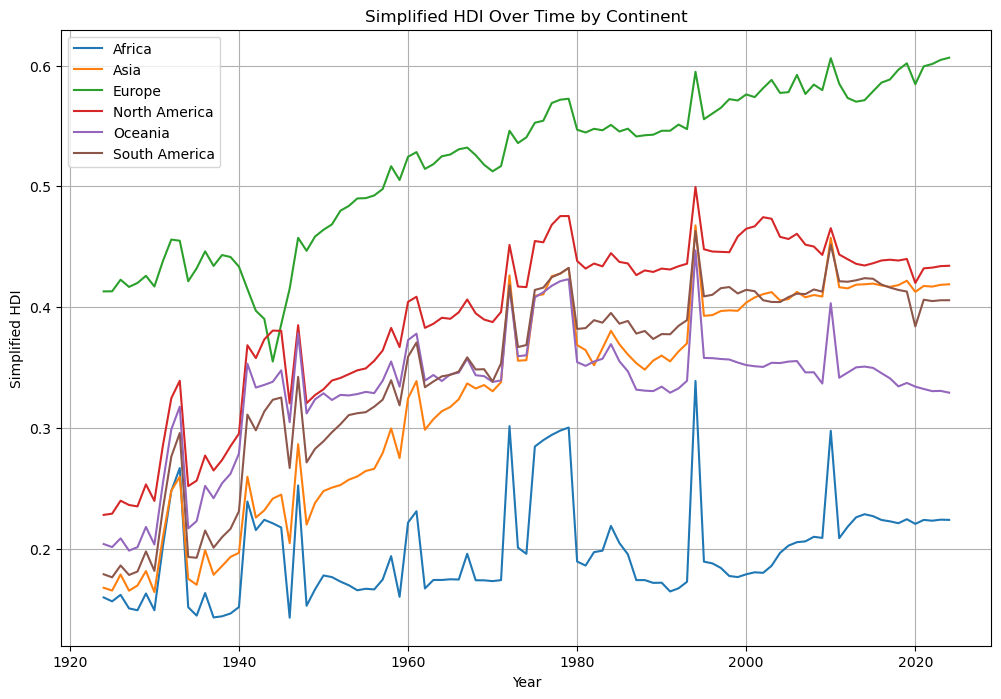

In [57]:
years = range(1924, 2025)

hdi_columns = {}

# Loop through each year, normalize, calculate the simplified HDI
for year in years:
    # Normalize GNI and life expectancy for the current year
    gni_normalized = normalize_column(merged_data[f'{year}_gni'])
    life_expectancy_normalized = normalize_column(merged_data[f'{year}_life_expectancy'])
    
    # Calculate the simplified HDI for the current year and store in the dictionary
    hdi_columns[f'{year}_hdi'] = (gni_normalized + life_expectancy_normalized) / 2

# Convert the dictionary to a DataFrame
hdi_df = pd.DataFrame(hdi_columns)

# concatenate hdi_df to merged_data
hdi_df = pd.concat([merged_data, hdi_df], axis=1)

# initialize hdi_data as an empty DataFrame
hdi_data = pd.DataFrame()

# Loop through each year again to aggregate the simplified HDI by continent
for year in years:
    yearly_data = hdi_df.groupby('continent')[f'{year}_hdi'].mean().reset_index()
    yearly_data.rename(columns={f'{year}_hdi': 'hdi'}, inplace=True)
    yearly_data['year'] = year
    hdi_data = pd.concat([hdi_data, yearly_data], ignore_index=True)

# Pivot the hdi_data DataFrame for easier plotting
plot_data_pivoted = hdi_data.pivot(index='year', columns='continent', values='hdi')

# Plotting
plt.figure(figsize=(12, 8))
for continent in plot_data_pivoted.columns:
    plt.plot(plot_data_pivoted.index, plot_data_pivoted[continent], label=continent)

plt.title('Simplified HDI Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Simplified HDI')
plt.legend()
plt.grid(True)
plt.show()


The analysis of Simplified Human Development Index (HDI) scores over time reveals distinct patterns of progress across continents. Asia's marked increase in HDI from the 1970s onwards reflects its economic boom and health advances. Africa, although starting from a lower baseline, shows persistent growth, suggesting improvements in life expectancy and economic conditions. Oceania's HDI fluctuates, hinting at the varying stages of development within the region. Europe and North America maintain high, stable HDI scores, with Europe experiencing gradual enhancements, indicative of their sustained quality of life. South America progresses more slowly, yet positively. These trends are critical for informing policy direction, particularly in developing regions, and suggest a potential link between rising HDI scores and decreasing birth rates. The increase in GNI, especially in Asia, points to significant economic shifts, while longer life expectancies may signal enhanced health infrastructure. This HDI overview underscores the need for comprehensive strategies to support human development worldwide.


### Bubble Chart GNI per Capita vs Life Expectancy vs Population

Collect all data needed for the graph

In [58]:
from matplotlib.lines import Line2D

In [59]:
selected_years = [1924, 1974, 2024]

# Prepare population data
population_sums = {}
for year in selected_years:
    population_sums[f'{year}_population'] = merged_data.groupby('continent')[f'{year}_population'].sum()

# Convert to DataFrame and reset index
population_sums_df = pd.DataFrame(population_sums).reset_index()
population_sums_melted = population_sums_df.melt(id_vars='continent', var_name='Year', value_name='Total Population')
population_sums_melted['Year'] = population_sums_melted['Year'].str.extract('(\d+)').astype(int)

# Prepare GNI per capita data
gni_per_cap = {}
for year in selected_years:
    gni_per_cap[f'{year}_gni'] = merged_data.groupby('continent')[f'{year}_gni'].median()

# Convert to DataFrame and reset index
gni_per_cap_df = pd.DataFrame(gni_per_cap).reset_index()
gni_per_cap_melted = gni_per_cap_df.melt(id_vars='continent', var_name='Year', value_name='GNI per Capita')
gni_per_cap_melted['Year'] = gni_per_cap_melted['Year'].str.extract('(\d+)').astype(int)

# Prepare life expectancy data
life_expectancy = {}
for year in selected_years:
    life_expectancy[f'{year}_life_expectancy'] = merged_data.groupby('continent')[f'{year}_life_expectancy'].mean()

# Convert to DataFrame and reset index
life_expectancy_df = pd.DataFrame(life_expectancy).reset_index()
life_expectancy_melted = life_expectancy_df.melt(id_vars='continent', var_name='Year', value_name='Average Life Expectancy')
life_expectancy_melted['Year'] = life_expectancy_melted['Year'].str.extract('(\d+)').astype(int)

Merge the data

In [60]:
# Merge all datasets
gni_pop_life = pd.merge(population_sums_melted, gni_per_cap_melted, on=['continent', 'Year'])
gni_pop_life = pd.merge(gni_pop_life, life_expectancy_melted, on=['continent', 'Year'])

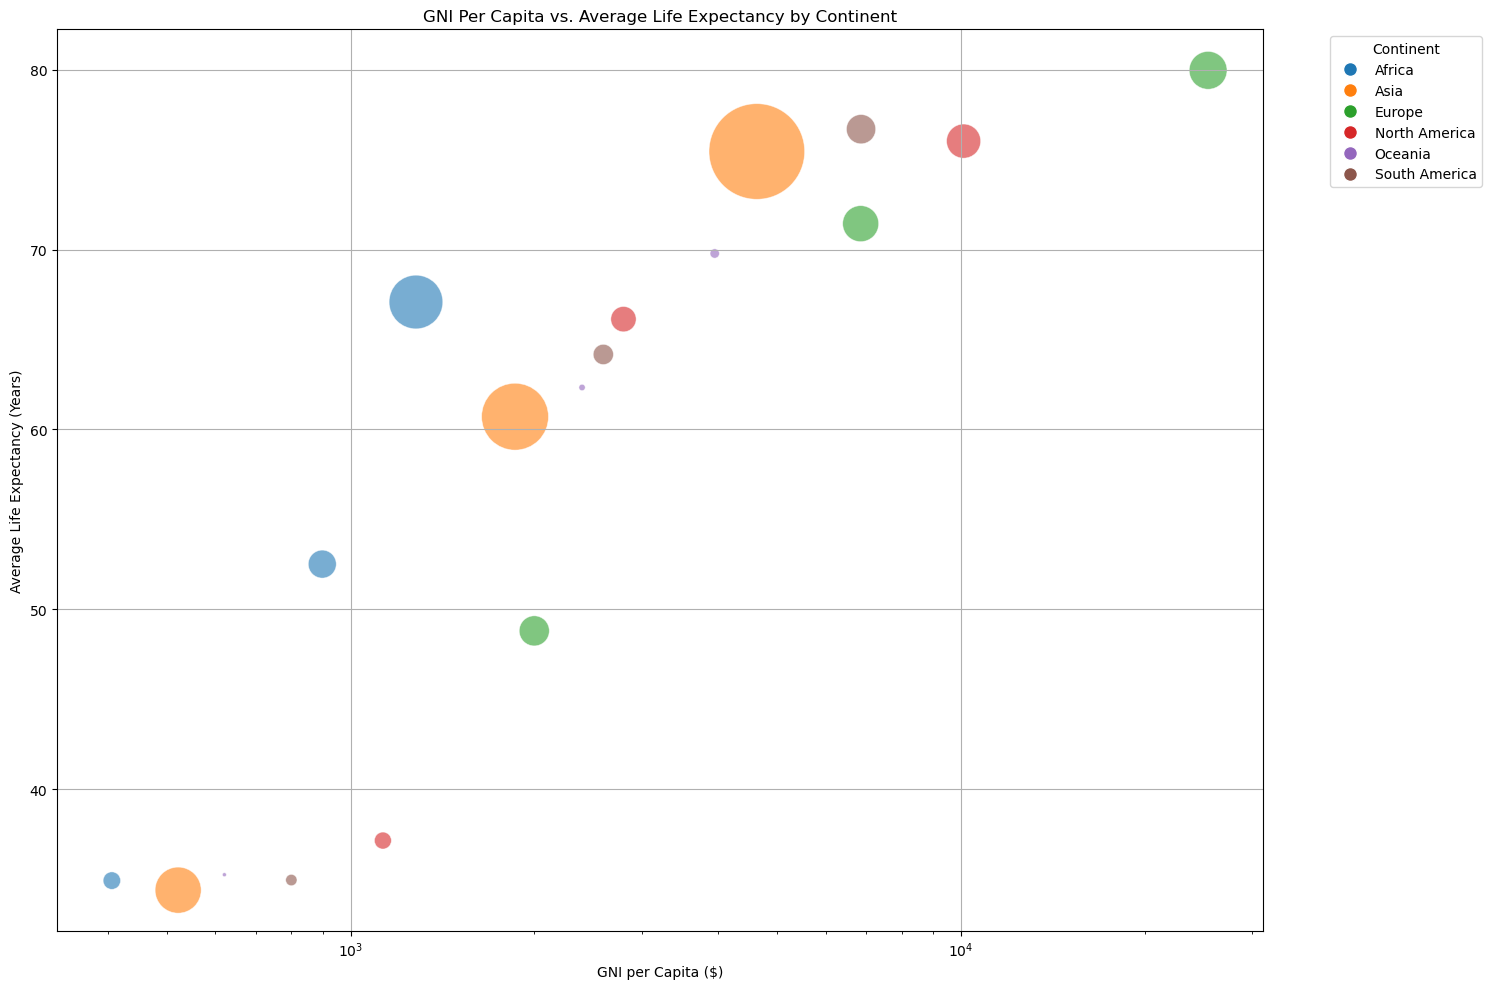

In [61]:
# Use a different color for each continent
continents = gni_pop_life['continent'].unique()
colors = plt.cm.tab10(range(len(continents)))
continent_colors = {continent: color for continent, color in zip(continents, colors)}

# Create a figure and adjust figure size
plt.figure(figsize=(15, 10))

# Create a list for custom legend handles
legend_handles = []

for continent in continents:
    subset = gni_pop_life[gni_pop_life['continent'] == continent]
    # Use the population as the size of the bubble
    bubble_sizes = subset['Total Population'] / 1e6  # Scale population for bubble size
    scatter = plt.scatter(subset['GNI per Capita'], subset['Average Life Expectancy'], 
                          s=bubble_sizes, color=continent_colors[continent], alpha=0.6, 
                          edgecolors="w", linewidth=0.5)
    
    # Add custom legend handle
    legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=continent_colors[continent],
                                 markersize=10, label=continent))

# Create a custom legend
plt.legend(handles=legend_handles, title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the title and labels
plt.title('GNI Per Capita vs. Average Life Expectancy by Continent')
plt.xlabel('GNI per Capita ($)')
plt.ylabel('Average Life Expectancy (Years)')

# Set the scale for axes
plt.xscale('log')  # Logarithmic scale for GNI per capita
plt.yscale('linear')  # Linear scale for life expectancy

plt.grid(True)
plt.tight_layout()
plt.show()


The bubble chart illustrates the relationship between GNI per capita and average life expectancy across various continents. Larger bubbles represent greater population sizes. Generally, there's a positive correlation: continents with higher GNI per capita, such as Europe and North America, also have higher life expectancies. Africa and Asia have lower GNIs per capita, with correspondingly lower life expectancies, although Asia's large bubble size indicates its significant population. Oceania and South America are in the middle range for both GNI and life expectancy. The chart suggests that economic prosperity is associated with longer lives, but population size does not directly dictate life expectancy.

#### Animated Bubble Chart

In [62]:
# selected_years = [year for year in range(1924, 2025)]

# # Prepare population data
# population_sums = {f'{year}_total_population': merged_data.groupby('continent')[f'{year}_population'].sum() for year in selected_years}
# population_sums_df = pd.DataFrame(population_sums).reset_index()
# population_sums_melted = population_sums_df.melt(id_vars='continent', var_name='Year', value_name='Total Population')
# population_sums_melted['Year'] = population_sums_melted['Year'].str.extract('(\d+)').astype(int)

# # Prepare GNI per capita data
# gni_per_cap = {f'{year}_gni_per_cap': merged_data.groupby('continent')[f'{year}_gni'].median() for year in selected_years}
# gni_per_cap_df = pd.DataFrame(gni_per_cap).reset_index()
# gni_per_cap_melted = gni_per_cap_df.melt(id_vars='continent', var_name='Year', value_name='GNI per cap')
# gni_per_cap_melted['Year'] = gni_per_cap_melted['Year'].str.extract('(\d+)').astype(int)

# # Prepare life expectancy data
# life_expectancy_sums = {f'{year}_life_expectancy': merged_data.groupby('continent')[f'{year}_life_expectancy'].mean() for year in selected_years}
# life_expectancy_df = pd.DataFrame(life_expectancy_sums).reset_index()
# life_expectancy_melted = life_expectancy_df.melt(id_vars='continent', var_name='Year', value_name='Average Life Expectancy')
# life_expectancy_melted['Year'] = life_expectancy_melted['Year'].str.extract('(\d+)').astype(int)

# # Merge datasets
# gni_pop_life = pd.merge(pd.merge(population_sums_melted, gni_per_cap_melted, on=['continent', 'Year']), life_expectancy_melted, on=['continent', 'Year'])

# # Continue with plotting adjustments for life expectancy vs GNI per capita, with population as bubble size
# output_dir = '"/Users/erikmercado/Documents/generalassembly/projects/project_1/images"'
# os.makedirs(output_dir, exist_ok=True)

# # Adjust the draw_plot_for_year function to plot life expectancy on the y-axis and change bubble sizes based on population
# def draw_plot_for_year(year, x_limits, y_limits):
#     plt.figure(figsize=(15, 10))
#     ax = plt.gca()
    
#     for continent in continents:
#         subset = gni_pop_life[(gni_pop_life['continent'] == continent) & (gni_pop_life['Year'] == year)]
#         bubble_sizes = subset['Total Population'] / 1e6  # Scale as needed
#         plt.scatter(subset['GNI per cap'], subset['Average Life Expectancy'], s=bubble_sizes, color=continent_colors[continent], alpha=0.6, edgecolors="w", linewidth=0.5)
    
#     plt.title(f'GNI Per Capita vs. Life Expectancy by Continent - {year}')
#     plt.xlabel('GNI per Capita ($)')
#     plt.ylabel('Life Expectancy (Years)')
#     plt.xscale('log')
#     plt.yscale('linear')  # Assuming life expectancy is better represented on a linear scale
#     plt.grid(True)
#     plt.legend(handles=legend_handles, title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
#     ax.set_xlim(x_limits)
#     ax.set_ylim(y_limits)

#     plt.tight_layout()
#     filename = os.path.join(output_dir, f'plot_{year}.png')
#     plt.savefig(filename)
#     plt.close()
#     return filename


# x_limits = (gni_pop_life['GNI per cap'].min(), gni_pop_life['GNI per cap'].max())
# y_limits = (life_expectancy_melted['Average Life Expectancy'].min(), life_expectancy_melted['Average Life Expectancy'].max())


# filenames = [draw_plot_for_year(year, x_limits, y_limits) for year in years]

# # Compile the individual plots into a GIF
# gif_path = os.path.join(output_dir, 'gni_pop_trend.gif')
# with imageio.get_writer(gif_path, mode='I', duration=2) as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

# # Optionally remove individual .png files
# for filename in filenames:
#     os.remove(filename)

In [63]:
# from IPython.display import display, Image

# # For a GIF stored locally on your machine
# display(Image(filename='images/gni_pop_trend.gif'))

# Conclusion

Over the century, the global population has experienced a massive surge, quintupling in size. This growth has not occurred evenly across the globe, with continents like Africa witnessing unprecedented rates, while Europe's growth has been relatively modest. Despite the vast increase in numbers, life expectancy has also risen significantly, indicative of improvements in healthcare, nutrition, and general living standards. The relationship between population growth and life expectancy does not suggest that an increasing population compromises longevity; in fact, life expectancy has improved even in the most populous regions.

GNI per capita has shown a general uptrend, reflective of global economic development. However, this economic growth has not been uniformly experienced; disparities are evident with high-income nations exhibiting greater life expectancies, pointing towards the economic divide that influences health outcomes.

The study's insights are vital in shaping sustainable development policies. They highlight the importance of equitable economic growth, suggesting that while increases in GNI can enhance the quality of life, it must be paired with healthcare advancements to foster widespread improvements in life expectancy.

In terms of GNI and life expectancy, countries' performance varied, with some showing remarkable progress and others lagging, underscoring the need for targeted developmental assistance and healthcare initiatives. The analysis strongly advocates for a balanced approach, integrating economic, health, and demographic considerations, to ensure that all regions can partake in and contribute to the global advancement.